In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.patches as mpatches

## SPD - slack parameter study - 60 Nodes

In [45]:
df = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\new\\data_6\\data_spd_2_n_60_p_900_hops.csv')

In [46]:
df.head()

,run,PauseTime,repetition,Module,meanNbHops
0,RandomWaypointMobility-SPD-B-80-20220108-21:52...,900,20,TARPNetwork.node[14].generic.np,0.000000
1,RandomWaypointMobility-SPD-B-80-20220108-21:52...,900,20,TARPNetwork.node[15].generic.np,0.000000
2,RandomWaypointMobility-SPD-B-80-20220108-21:52...,900,20,TARPNetwork.node[18].generic.np,0.000000
3,RandomWaypointMobility-SPD-B-80-20220108-21:52...,900,20,TARPNetwork.node[17].generic.np,3.109853
4,RandomWaypointMobility-SPD-B-73-20220108-21:47...,900,13,TARPNetwork.node[26].generic.np,0.000000


In [47]:
df.Module = df.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]

In [48]:
df = df.sort_values(by=['repetition'])

In [49]:
df_17 = df.loc[df['Module'] == '17']
df_22 = df.loc[df['Module'] == '22']

In [50]:
sorted(df_22.meanNbHops.round(decimals = 4).tolist())

[1.1644,
 1.2492,
 1.5303,
 1.9766,
 2.0138,
 2.1669,
 2.9232,
 3.0133,
 3.0356,
 3.7251,
 3.827,
 3.8598,
 3.8617,
 3.9017,
 3.98,
 3.9833,
 4.0106,
 4.076,
 4.0834,
 4.7187,
 4.843,
 5.573,
 5.8127,
 5.9499,
 6.5446,
 6.608,
 6.6757,
 6.9405,
 7.5539,
 7.8534]

In [52]:
df_22.meanNbHops.round(decimals = 4).mean()

4.2485100000000005

In [10]:
df_dd_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'meanNbHops':[3.0202, 3.3191, 3.4062, 3.464, 3.711, 3.979, 4.0783, 4.2428]})

dd_x_errors = [0.129, 0.19, 0.155, 0.217, 0.291, 0.312, 0.48, 0.655]


df_spd_1_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'meanNbHops':[2.653, 2.8952, 2.9245, 3.0309, 3.2732, 3.8241, 3.9849, 4.25]})

spd_1_x_errors = [0.131, 0.18, 0.174, 0.224, 0.303, 0.333, 0.506, 0.666]


df_spd_2_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'meanNbHops':[2.8234, 3.0508, 3.1263, 3.2321, 3.3927, 3.8601, 4.007, 4.2485]})

spd_2_x_errors = [0.124, 0.169, 0.168, 0.226, 0.281, 0.319, 0.497, 0.659]

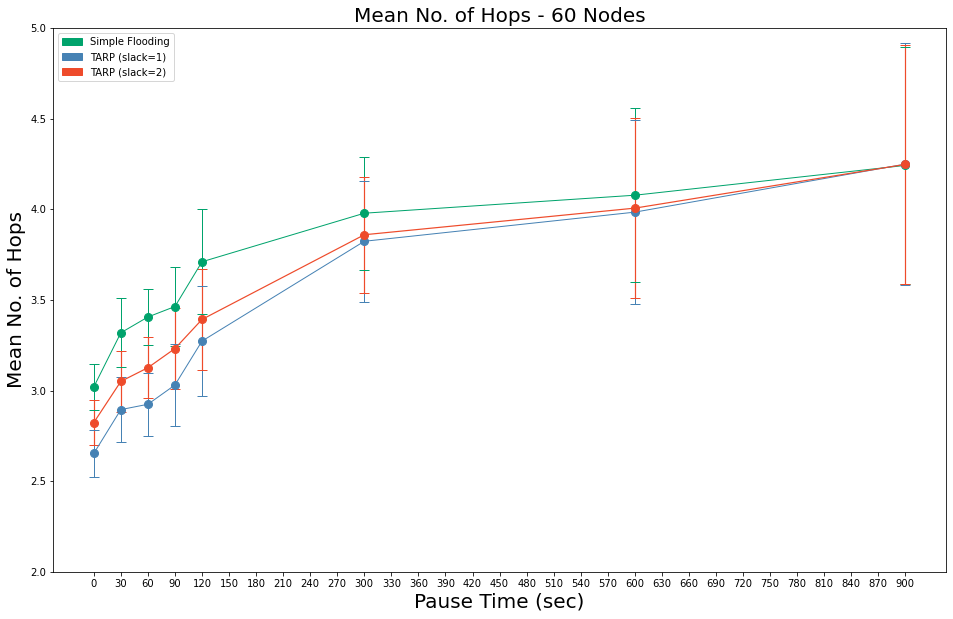

In [20]:
plt.xlabel("Pause Time (sec)", fontsize=20)
plt.ylabel("Mean No. of Hops", fontsize=20)
plt.title("Mean No. of Hops - 60 Nodes", fontsize=20)

plt.xticks(np.arange(0,901, 30))
plt.yticks(np.arange(0,6, 0.5))
# plt.grid()


plt.ylim([2, 5])

plt.errorbar(
  x=df_dd_x.PauseTime, 
  y=df_dd_x.meanNbHops, 
  yerr=dd_x_errors, 
  capsize=5,
  marker='o', 
  color='#00A36C', 
  markersize=8, 
  linewidth=1, 
  linestyle='-')

plt.errorbar(
  x=df_spd_1_x.PauseTime, 
  y=df_spd_1_x.meanNbHops, 
  yerr=spd_1_x_errors, 
  capsize=5,
  marker='o', 
  color='#4682B4', 
  markersize=8, 
  linewidth=1, 
  linestyle='-')

plt.errorbar(
  x=df_spd_2_x.PauseTime, 
  y=df_spd_2_x.meanNbHops, 
  yerr=spd_2_x_errors, 
  capsize=5,
  marker='o', 
  color='#EE4B2B', 
  markersize=8, 
  linewidth=1.2, 
  linestyle='-')

red_patch = mpatches.Patch(color='#EE4B2B', label='TARP (slack=2)')
green_patch = mpatches.Patch(color='#00A36C', label='Simple Flooding')
blue_patch = mpatches.Patch(color='#4682B4', label='TARP (slack=1)')

plt.legend(handles=[ green_patch, blue_patch, red_patch])

fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.savefig('final-simulation-pdf-60-new-hops-1.png', dpi=300)